<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DS-SF-42 | Class 8 | Regression - Addressing model fit

<br>
### _Predicting shots made per game by Kobe Bryant_

_Authors: Kiefer Katovich (SF) and Gus Ostow (SF)_

---

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression will cause issues that other datasets might not. In this exploration you will be diagnose issues with model fit using regression metrics, train/test split, and cross validation.


### Plan

Today I am going to flip the script: we are going to start the class with a hands-on partner activity to motivate the day's topic, then address the theory after.

1. Motivating the problem
3. Slides interlude
2. Addressing the problem

### Teams

<img src=https://i.imgur.com/JI6ydY5.png align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# <font color=blue>Part I</font> - Motifivating the problem


---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

#### Guiding questions

- How many columns are there? 
- Examine what the observations (rows) and columns represent.
- Why does this dataset _feel_ different than the datasets we've touched so far?
- What concerns do you have even before fitting your first model?

In [3]:
# A:

kobe.describe()

# data is unclear, can't see all columns
# some is categorical vs. some are continuous 
# don't know what to predict 
# too many columns 

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,7.358793,0.500642,0.001284,0.001284,0.000642,0.000642,0.001284,0.001284,0.000642,0.000642,...,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766,42.946727,780.486521
std,3.471180,0.500160,0.035817,0.035817,0.025335,0.025335,0.035817,0.035817,0.025335,0.025335,...,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402,26.048206,449.923227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,391.250000
50%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,780.500000
75%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,63.000000,1169.750000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941,105.000000,1559.000000


In [15]:
kobe[kobe.filter(like='ACTION_TYPE').columns].describe()

,ACTION_TYPE:alley_oop_dunk_shot,ACTION_TYPE:alley_oop_layup_shot,ACTION_TYPE:cutting_finger_roll_layup_shot,ACTION_TYPE:cutting_layup_shot,ACTION_TYPE:driving_bank_shot,ACTION_TYPE:driving_dunk_shot,ACTION_TYPE:driving_finger_roll_layup_shot,ACTION_TYPE:driving_finger_roll_shot,ACTION_TYPE:driving_floating_bank_jump_shot,ACTION_TYPE:driving_floating_jump_shot,...,ACTION_TYPE:slam_dunk_shot,ACTION_TYPE:step_back_jump_shot,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,0.003535,0.002391,0.000046,0.000223,0.000165,0.010127,0.002246,0.002514,0.000071,0.000161,...,0.015188,0.003643,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766
std,0.013362,0.011149,0.001810,0.003617,0.002930,0.028387,0.011865,0.012849,0.002815,0.003417,...,0.036864,0.015250,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632
max,0.125000,0.153846,0.071429,0.066667,0.062500,0.500000,0.111111,0.142857,0.111111,0.105263,...,0.333333,0.166667,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941


In [72]:
for col in kobe.columns:
    print col

SHOTS_MADE
AWAY_GAME
SEASON_OPPONENT:atl:1996-97
SEASON_OPPONENT:atl:1997-98
SEASON_OPPONENT:atl:1999-00
SEASON_OPPONENT:atl:2000-01
SEASON_OPPONENT:atl:2001-02
SEASON_OPPONENT:atl:2002-03
SEASON_OPPONENT:atl:2003-04
SEASON_OPPONENT:atl:2004-05
SEASON_OPPONENT:atl:2005-06
SEASON_OPPONENT:atl:2006-07
SEASON_OPPONENT:atl:2007-08
SEASON_OPPONENT:atl:2008-09
SEASON_OPPONENT:atl:2009-10
SEASON_OPPONENT:atl:2010-11
SEASON_OPPONENT:atl:2011-12
SEASON_OPPONENT:atl:2012-13
SEASON_OPPONENT:atl:2013-14
SEASON_OPPONENT:atl:2014-15
SEASON_OPPONENT:atl:2015-16
SEASON_OPPONENT:bkn:2012-13
SEASON_OPPONENT:bkn:2015-16
SEASON_OPPONENT:bos:1996-97
SEASON_OPPONENT:bos:1997-98
SEASON_OPPONENT:bos:1999-00
SEASON_OPPONENT:bos:2001-02
SEASON_OPPONENT:bos:2002-03
SEASON_OPPONENT:bos:2003-04
SEASON_OPPONENT:bos:2004-05
SEASON_OPPONENT:bos:2005-06
SEASON_OPPONENT:bos:2006-07
SEASON_OPPONENT:bos:2007-08
SEASON_OPPONENT:bos:2008-09
SEASON_OPPONENT:bos:2009-10
SEASON_OPPONENT:bos:2010-11
SEASON_OPPONENT:bos:2011-12

SEASON_OPPONENT:was:2010-11
SEASON_OPPONENT:was:2011-12
SEASON_OPPONENT:was:2012-13
SEASON_OPPONENT:was:2014-15
SEASON_OPPONENT:was:2015-16
SEASON:1996-97
SEASON:1997-98
SEASON:1998-99
SEASON:1999-00
SEASON:2000-01
SEASON:2001-02
SEASON:2002-03
SEASON:2003-04
SEASON:2004-05
SEASON:2005-06
SEASON:2006-07
SEASON:2007-08
SEASON:2008-09
SEASON:2009-10
SEASON:2010-11
SEASON:2011-12
SEASON:2012-13
SEASON:2013-14
SEASON:2014-15
SEASON:2015-16
MONTH
PLAYOFFS
MEAN_X_POSITION
MEAN_Y_POSITION
MEAN_SHOT_DISTANCE
MEAN_SHOT_ANGLE
SHOT_ZONE_RANGE:16-24_ft.
SHOT_ZONE_RANGE:24+_ft.
SHOT_ZONE_RANGE:8-16_ft.
SHOT_ZONE_RANGE:back_court_shot
SHOT_ZONE_RANGE:less_than_8_ft.
SHOT_ZONE_BASIC:above_the_break_3
SHOT_ZONE_BASIC:backcourt
SHOT_ZONE_BASIC:in_the_paint_(non-ra)
SHOT_ZONE_BASIC:left_corner_3
SHOT_ZONE_BASIC:mid-range
SHOT_ZONE_BASIC:restricted_area
SHOT_ZONE_BASIC:right_corner_3
SHOT_ZONE_AREA:back_court(bc)
SHOT_ZONE_AREA:center(c)
SHOT_ZONE_AREA:left_side_center(lc)
SHOT_ZONE_AREA:left_side(l)
SHO

In [ ]:
column_mask = kobe.filter()

In [42]:
list(kobe.columns.values).remove('SHOTS_MADE')

In [43]:
kobe2 = kobe.loc[:,kobe.columns!='SHOTS_MADE']

In [44]:
kobe2

,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,1,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,2,2
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,3,3
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,4,4
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,5,5
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,6,6
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,7,7
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,8,8
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,9,9
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,10,10


In [46]:
y = kobe['SHOTS_MADE']

In [75]:
y2 = kobe.drop('SHOTS_MADE', axis=1)

In [76]:
x = kobe2

In [79]:
x.shape[0] == y.shape[0]
#check if they have the same rows 

True

---

### 3.  Prepare the dataset for training AND validation

- Make predictor matrix `X` and target variable `y`
- Split your data into a validation set using `train_test_split`

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
#x and y are arguments. arguments are positional, based on where it is 
#test size is a keyword argument. doesn't matter where. has a default value 

In [104]:
print x_train.shape
print y_train.shape

(1168, 644)
(1168,)


---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

1. How does it perform? Keep the regression metrics we talked about on Tuesday in mind, like mean squared error, mean absolute error, and $R^2$
2. Is there a disparity between your train set and your test set? What does that indicate?

In [105]:
# A:

ln = LinearRegression()
model = ln.fit(x_train, y_train)

prediction = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = model.score(x_test,y_test)

print 'training score:', score_train
print 'test score:', score_test

training score: 0.860737299303
test score: -2.70952488559e+15


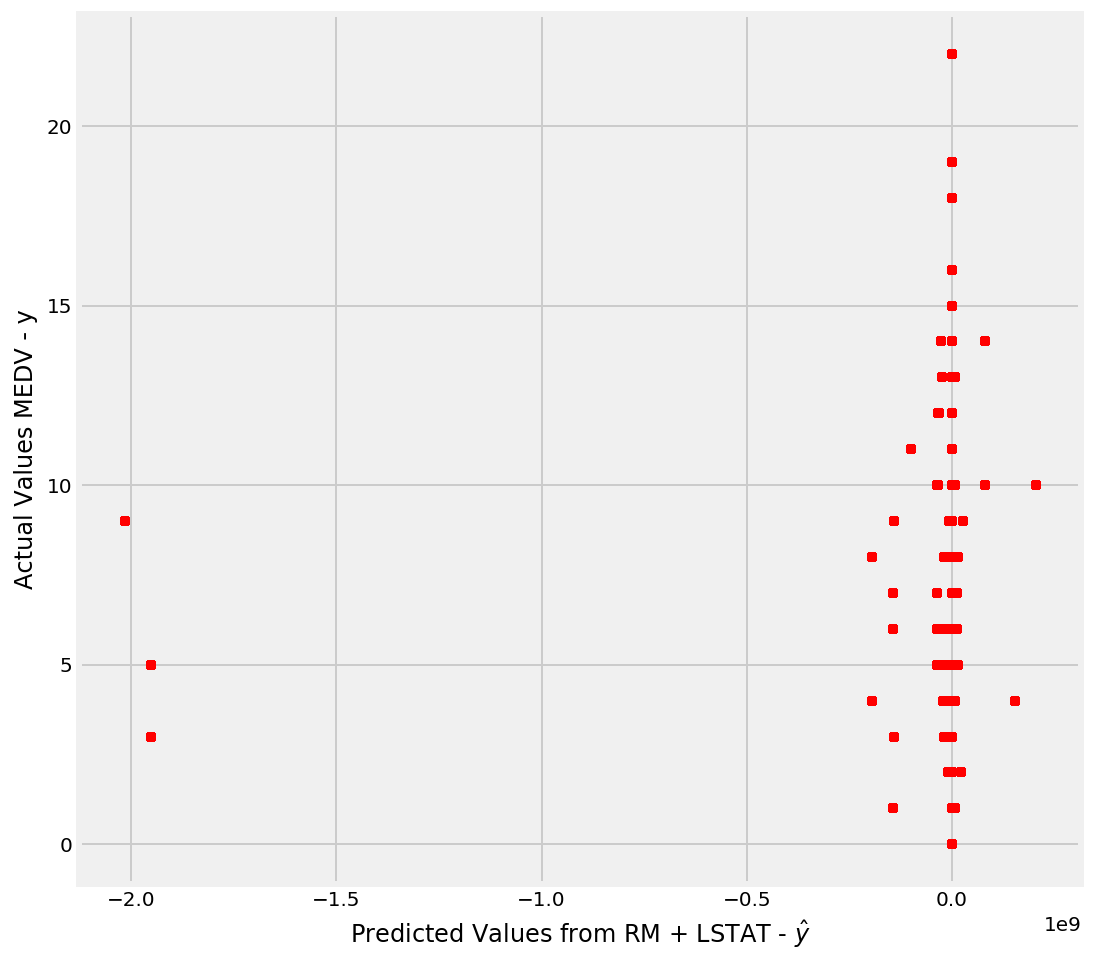

score:  0.827121629856


In [106]:
plt.figure(figsize=(8,8))
plt.scatter(prediction, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

print "score: ", score

# <font color=blue> Interlude</font> - Slides

Sit back and enjoy the show...

----
# <font color=blue> Part II</font> - Addressing the problem

---

### 6. Try fitting ealuating a  `Ridge` model instead of a standard `LinearRegression`
The ridge regression is a model _similar_ to the standard linear regression, but for now let it remain shrouded in an \*air\* of mystery.

Is it better than the Linear regression? On the training set? On the test set? Why do you think that is?

In [148]:
# A:

rd = Ridge(alpha=1)
model2 = rd.fit(x_train, y_train)

prediction2 = model2.predict(x_test)
score_train2 = model2.score(x_train, y_train)
score_test2 = model2.score(x_test,y_test)

print 'training score:', score_train2
print 'test score:', score_test2

training score: 0.823069094404
test score: 0.554238984433


---
### 7. Examine your ridge model's coefficients

Does anything jump out at you? Use any the tools we've learned so far like histograms, barplots, and other descriptive statistics to compare the ridge model's fit to the linear regression we used earlier.


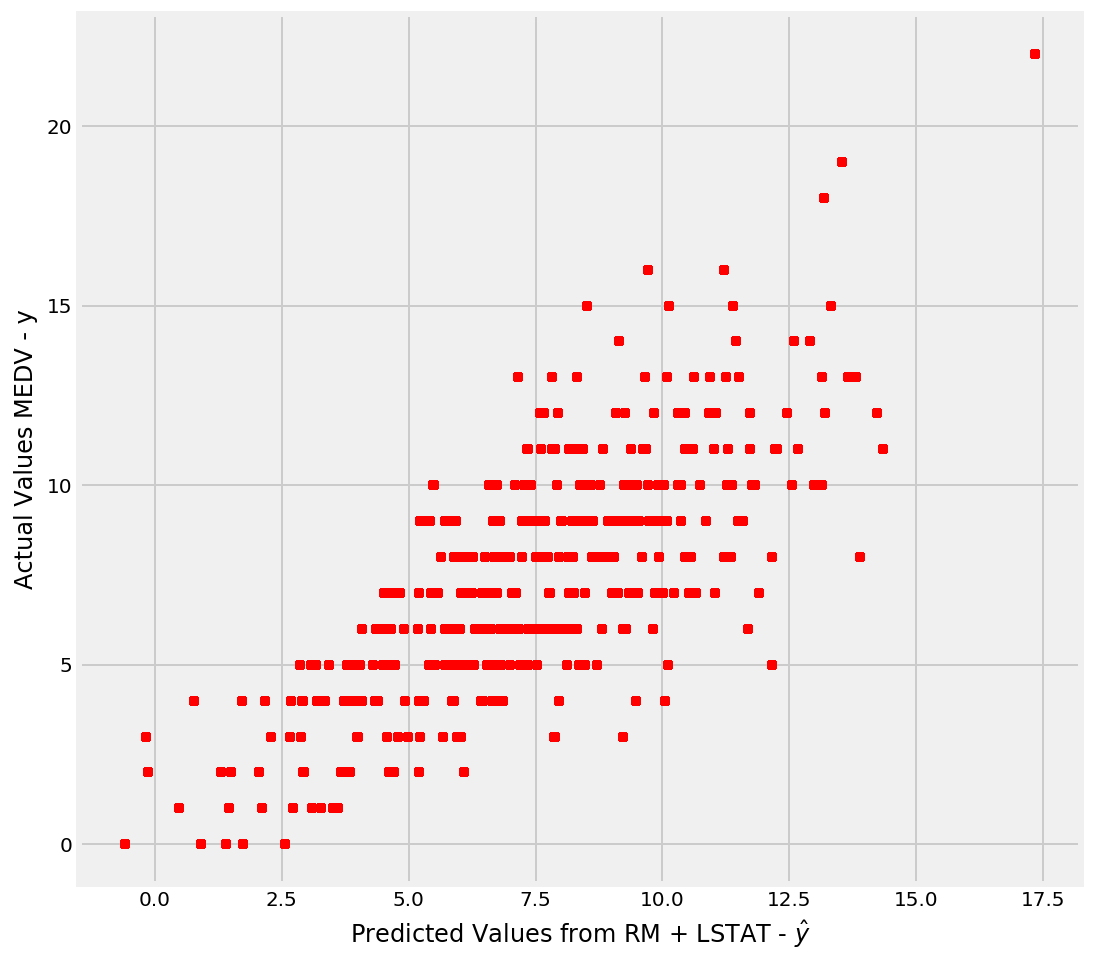

In [149]:
plt.figure(figsize=(8,8))
plt.scatter(prediction2, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

array([ -3.90134753e-01,   3.04941666e+08,   1.94952406e+09,
         1.93910403e+08,   3.54150526e+07,  -3.48583131e+07,
         3.07340218e+07,  -2.00644302e+09,   1.41609351e+08,
         2.38110169e+07,   3.74570073e+07,   5.32534012e+06,
         5.37825321e+03,   7.93582542e+07,  -4.00607354e+06,
         7.62594469e+06,  -1.75044130e+07,  -2.38536784e+07,
         2.12635396e+07,  -1.32948849e+07,  -1.75044134e+07,
        -3.50476056e+07,   3.04941664e+08,   1.94952406e+09,
         1.93910405e+08,  -3.48583173e+07,   3.07340182e+07,
         9.33295525e+06,   1.41609351e+08,   2.38110159e+07,
         3.74570088e+07,   5.32533869e+06,   5.38112164e+03,
        -3.71531642e+04,  -4.00607142e+06,   7.62594863e+06,
        -1.75044170e+07,  -6.40531378e+06,  -1.32948900e+07,
         3.04941667e+08,   1.94952406e+09,   1.93643255e+07,
         1.93910400e+08,   3.54150505e+07,  -3.48583146e+07,
         1.41609353e+08,   2.38110173e+07,   3.74570049e+07,
         5.32533848e+06,

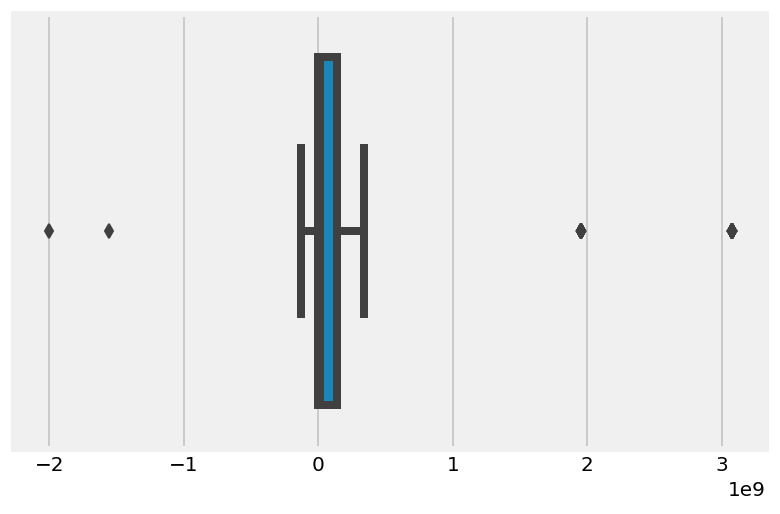

In [176]:
sns.boxplot(model.coef_)

In [181]:
print model.coef_.std()
print model2.coef_.std()
print model.coef_.mean()
print model2.coef_.mean()

920275955.131
0.87506269091
371462727.644
0.0020841818699


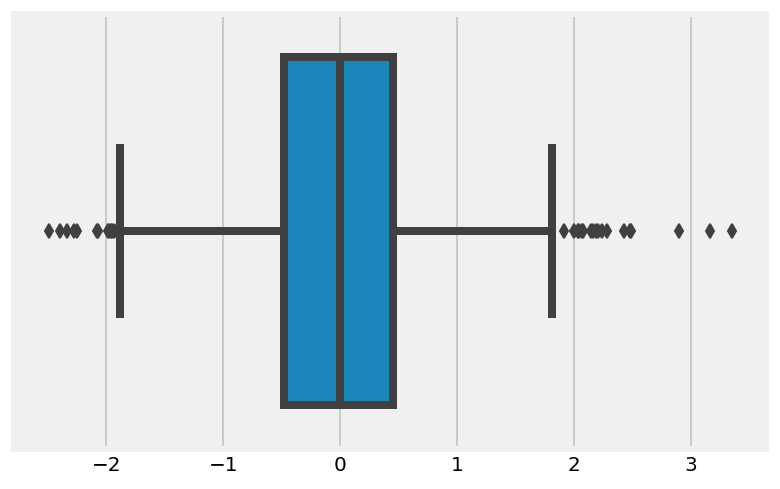

In [177]:
sns.boxplot(model2.coef_)

(array([   5.,   10.,   67.,  211.,  254.,   76.,   13.,    5.,    2.,    1.]),
 array([-6.06226892, -4.56579268, -3.06931644, -1.5728402 , -0.07636396,
         1.42011228,  2.91658852,  4.41306476,  5.90954101,  7.40601725,
         8.90249349]),
 <a list of 10 Patch objects>)

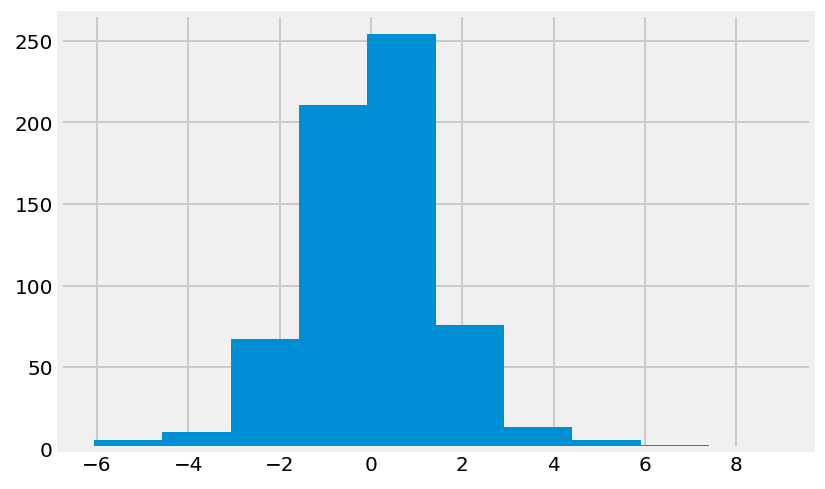

In [147]:
plt.hist(model2.coef_)

---

### 8. Play around with the `alpha` hyper parameter

How does this impact the coefficients of the fit model?

#### EX:
```python
ridge = Ridge(alpha = 10.0)
```

Some good values to try might be `0`, `0.1`, `1.0`, `10`, `100`

In [7]:
# A:

#larger alpha makes coefficients smaller? smaller alpha makes coefficients bigger 

---

### 9. Fit a `Lasso` model and examine it's coefficients

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

- Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
- What percent of the variables in the original dataset are "zeroed-out" by the lasso?
- What are the most important predictors for how many shots Kobe made in a game?

In [170]:
# A:


ls = Lasso()
model3 = ls.fit(x_train, y_train)

prediction3 = model3.predict(x_test)
score_train3 = model3.score(x_train, y_train)
score_test3 = model3.score(x_test,y_test)

print 'training score:', score_train3
print 'test score:', score_test3


training score: 0.606240455276
test score: 0.601854225366


In [167]:
model3.coef_.shape
x_train.shape

df_coef = pd.DataFrame(zip(model3.coef_, x_train))
df_coef.columns = ['coefficient', 'feature']
df_coef.sort_values('coefficient',ascending=False)

,coefficient,feature
574,0.061121,SHOT_TYPE:2pt_field_goal
584,0.033045,PERIOD
569,0.015987,SHOT_ZONE_AREA:center(c)
583,0.009599,MINUTES_REMAINING
582,0.005672,SECONDS_REMAINING
643,0.000044,CAREER_GAME_NUMBER
432,-0.000000,SEASON_OPPONENT:sac:2008-09
431,-0.000000,SEASON_OPPONENT:sac:2007-08
430,0.000000,SEASON_OPPONENT:sac:2006-07
433,0.000000,SEASON_OPPONENT:sac:2009-10


---

### 10. Tune the alpha for your `Lasso` model

How does this influence the coefficients? The model performance on the train and the test sets?

In [9]:
# A:

---

### 11. Synthesize what you've discovered

Write a couple of sentences telling the story: 
- How did a standard linear regression perform on the Kobe dataset? What qualities of this dataset caused these results>
- How did a Ridge perform in comparison? What clues could you glean from its coefficients? How does `alpha` seem to dictate the coefficients?
- What about the the `Lasso`?
- When will be useful?

In [10]:
# A: